In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Правая часть уравнения
def f(x):
    return (x**2 + 2*x + 2) / (x + 1)

# Граничная функция, удовлетворяющая u(0)=0, u(1)=2ln2
def g(x):
    return 2 * np.log(2) * x

# Производные приближенного решения
def L_phi(phi, x):
    h = 1e-5
    d_phi = (phi(x + h) - phi(x - h)) / (2 * h)
    d2_phi = (phi(x + h) - 2 * phi(x) + phi(x - h)) / h**2
    return d2_phi + (x + 1) * d_phi - phi(x)

# Базисные функции: удовлетворяют однородным граничным условиям
def basis_functions(N):
    return [lambda x, n=n: x * (1 - x) * x**n for n in range(N + 1)]

# Метод Галёркина
def galerkin_modified(N):
    phi = basis_functions(N)
    A = np.zeros((N + 1, N + 1))
    b = np.zeros(N + 1)

    for i in range(N + 1):
        for j in range(N + 1):
            integrand_A = lambda x: L_phi(phi[j], x) * phi[i](x)
            A[i, j], _ = quad(integrand_A, 0, 1)

        # Правая часть с учетом g(x)
        integrand_b = lambda x: (f(x) - L_phi(g, x)) * phi[i](x)
        b[i], _ = quad(integrand_b, 0, 1)

    # Решение системы
    c = np.linalg.solve(A, b)

    # Сборка финального приближенного решения u(x) = g(x) + sum c_i * phi_i(x)
    x_vals = np.linspace(0, 1, 200)
    u_vals = g(x_vals)
    for i in range(N + 1):
        u_vals += c[i] * phi[i](x_vals)

    # Точное решение
    exact_u = (x_vals + 1) * np.log(x_vals + 1)
    error = np.abs(u_vals - exact_u)

    return x_vals, u_vals, exact_u, error

# Параметры и запуск
N = 4
x_vals, u_vals, exact_u, error = galerkin_modified(N)

print("Решение:", u_vals, '\n')
print("Точное решение:", exact_u, '\n')
print("Погрешность:", error, '\n')


Решение: [0.         0.00503777 0.01010066 0.01518853 0.02030127 0.02543875
 0.03060086 0.03578748 0.04099848 0.04623376 0.05149319 0.05677666
 0.06208406 0.06741528 0.0727702  0.07814872 0.08355071 0.08897609
 0.09442473 0.09989653 0.10539138 0.11090918 0.11644983 0.12201322
 0.12759925 0.13320781 0.13883882 0.14449216 0.15016774 0.15586546
 0.16158522 0.16732693 0.17309049 0.17887581 0.18468279 0.19051134
 0.19636137 0.20223278 0.20812549 0.21403941 0.21997443 0.22593049
 0.23190748 0.23790533 0.24392394 0.24996323 0.25602312 0.26210352
 0.26820434 0.27432551 0.28046694 0.28662855 0.29281026 0.29901199
 0.30523366 0.31147519 0.3177365  0.32401752 0.33031816 0.33663835
 0.34297802 0.34933709 0.35571549 0.36211313 0.36852996 0.37496588
 0.38142084 0.38789476 0.39438757 0.4008992  0.40742958 0.41397863
 0.42054629 0.4271325  0.43373717 0.44036025 0.44700167 0.45366136
 0.46033926 0.46703529 0.4737494  0.48048152 0.48723158 0.49399953
 0.50078529 0.50758881 0.51441002 0.52124887 0.528105

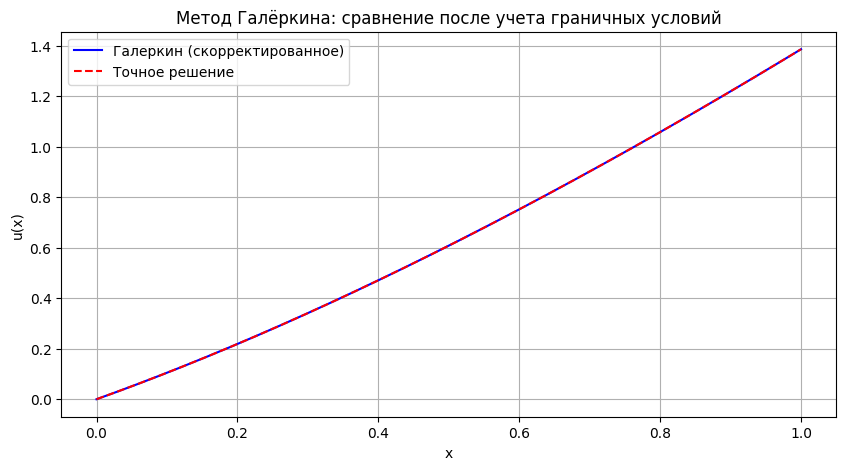

In [3]:
# График решений
plt.figure(figsize=(10, 5))
plt.plot(x_vals, u_vals, label='Галеркин (скорректированное)', color='blue')
plt.plot(x_vals, exact_u, '--', label='Точное решение', color='red')
plt.title("Метод Галёркина: сравнение после учета граничных условий")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()
